## Assignment 1

## Student Name : Ayush Puri

## Student ID: 47369655

Consider the sliding-tile puzzle pictured below. There are three black tiles, a blank space (empty location), and three yellow tiles, arranged randomly in the initial configuration given below:

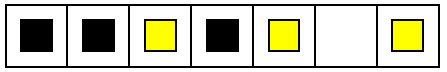

There are three legal moves:
1. (simple move) any tile can move into an adjacent empty location,
2. (jump move) any tile can jump over exactly one tile and land in the empty location, and
3. (jump move) any tile can jump over exactly two tiles and land in the empty location.

The cost of a simple move is 1. The cost of a jump move is the number of tiles jumped over.
The goal is to move all the yellow tiles to the left of all the black tiles as follows:

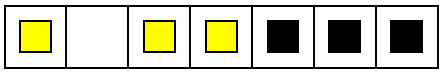

Note that the final configuration is not unique as the blank space can be in 7 different locations and in each case the yellow and black tiles satisfy the goal conditions.

The objective is to solve the sliding-tile puzzle using various search strategies. That is, find a sequence of legal moves that takes a given "initial" configuration (start) to the specified "final" one (goal) state.

You will have to complete the code cells below. More explanations and comments need to be provided there.  

Note that in case a solution does **not** exist for some *start* and *goal* state pairs, your program will report it. 

The first search strategy to be considered is Iterative Deepening Search (IDS). Here are the required components for solving the sliding-tile puzzle using IDS:
1. State Representation: There will be a list of 6 tiles plus a blank space, with 2 colors for the tiles.
2. Goal Check: This function checks if the current state is the final state.
3. Legal Moves: The legal moves will need to be defined along with their costs.
4. Depth-Limited Search: This is a helper function to perform depth-limited search at each depth level.
5. Iterative Deepening Search (ID): Main function to perform the search which will keep calling the depth-limited search function until a solution has been found.
    

In [1]:
# the code for the goal state check function and the generation of all possible successors states 
# from the current state determined by the valid moves; there is also a helper function.

# Define the goal state check function
def is_goal(state):
    # The goal is to have all 'Y' tiles on the left of all 'B' tiles
    return state.find('B') >= state.rfind('Y')

# Generate all possible successors from the current state
def generate_successors(state):
    successors = []
    blank_index = state.index('_')

    # Move to adjacent positions
    if blank_index > 0:
        successors.append(swap(state, blank_index, blank_index - 1))
    if blank_index < 6:
        successors.append(swap(state, blank_index, blank_index + 1))

    # Jump over one tile
    if blank_index > 1:
        successors.append(swap(state, blank_index, blank_index - 2))
    if blank_index < 5:
        successors.append(swap(state, blank_index, blank_index + 2))

    # Jump over two tiles
    if blank_index > 2:
        successors.append(swap(state, blank_index, blank_index - 3))
    if blank_index < 4:
        successors.append(swap(state, blank_index, blank_index + 3))

    return successors

# Helper function to swap elements in the state
def swap(state, i, j):
    new_state = list(state)
    new_state[i], new_state[j] = new_state[j], new_state[i]
    return ''.join(new_state)

The following function implements depth-limited search using recursion. It will construct a path to the goal node while traversing the search tree up to the specified depth limit.

In particular, it takes in a state, a path and a depth level, and if the goal state has been found, it returns the path from the start state to the goal state. 

In [2]:
#Perform Depth-Limited Search (DLS)
def dls(state, depth_limit, path):
    if is_goal(state):
        return path
    if depth_limit == 0:
        return None

    for successor in generate_successors(state):
        if successor not in path:  # Avoid cycles
            result = dls(successor, depth_limit - 1, path + [successor])
            if result:
                return result

    return None

The following function implements Iterative Deepening Search (IDS) using depth-limited search. 

In particular, the ids function iteratively increases the depth limit and calls depth-limited seach function dls until the goal state has been reached. In particular, it takes in an initial state, and if the goal state has been found at some depth level by depth-limited search, it returns the path from the start state to the goal state. 


In [3]:
# Perform Iterative Deepening Search (IDS)
def ids(initial_state):
    depth = 0
    while True:
        result = dls(initial_state, depth, [initial_state])
        if result:
            return result
        depth += 1


Here is an example usage of the ids function:

In [4]:
## Initial state example
initial_state = 'BYBY_YB'

# Solve the puzzle
solution_path = ids(initial_state)

# Print the solution path
if solution_path:
    print("Solution found!")
    for step in solution_path:
        print(step)
else:
    print("No solution found.")

Solution found!
BYBY_YB
BY_YBYB
BYY_BYB
_YYBBYB
YY_BBYB
YYYBB_B



### Task 1

Your first task is to modify the program given above for solving a more general version of the sliding-tile puzzle: there will be <b>n tiles for each colour</b> plus a space, with any 3 colors for the tiles. In the example state given below, there are 3 black tiles, 3 red tiles, 3 yellow tiles, and a blank space (empty location), arranged randomly in the initial configuration given below:

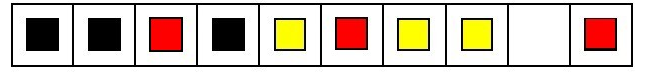

The goal is to move all the yellow tiles to the left of all the red tiles, and all the red tiles to the left of all the black tiles as follows:

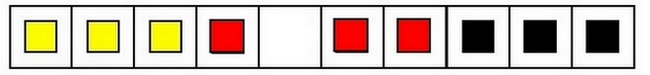

Note that the final configuration is not unique as the blank space can be in 10 different locations and in each case the yellow, red and black tiles satisfy the goal conditions.

You will need to revise the state representation, the goal check, and the moves accordingly. 
1. State Representation will have a list of <b>n tiles for each colour</b> plus a blank space, with any 3 colors for the tiles.
2. Tile Colur Ordering: This is given in a list of the first, the second and the third colours.
3. Goal Check: All the tiles of the first color will be side-by-side to the left, the tiles of the second color in the middle, and the tiles of  the third color to the right. As before, the blank space can be located anywhere.
4. Legal Moves: These are the same as before, a tile can be moved to an adjacent blank location, it can jump over one tile to land in the empty location, or jump over two tiles to land in the empty location.

Your revised Iterative Deepening Search program will print the sequence of states starting form the initial state to a goal state, along with the total number of nodes generated and the total runtime.

You need to provide the code where you see **pass** and add any other helper function / code you will need for your program.

In [73]:
# the code for the goal state check function and the generation of all possible successors states 
# from the current state determined by the valid moves; add any helper functions you may need for this part

import random
from collections import deque
import time

# Define the goal state check function
def is_goal(state, n, colors):
   # The goal is to have all tiles of the first color to the left,
    # the tiles of the second color in the middle,
    # and the tiles of the third color to the right
    first_color_tiles = state[:n]
    second_color_tiles = state[n:2*n]
    third_color_tiles = state[2*n:3*n]

    return (
        all(tile == colors[0] for tile in first_color_tiles) and
        all(tile == colors[1] for tile in second_color_tiles) and
        all(tile == colors[2] for tile in third_color_tiles)
    )


# Generate all possible successors from the current state
def generate_successors(state):
    successors = []
    blank_index = state.index('_')
    
    # Move to adjacent positions
    if blank_index > 0:
        successors.append(swap(state, blank_index, blank_index - 1))
    if blank_index < len(state) - 1:
        successors.append(swap(state, blank_index, blank_index + 1))
    
    # Jump over one tile
    if blank_index > 1:
        successors.append(swap(state, blank_index, blank_index - 2))
    if blank_index < len(state) - 2:
        successors.append(swap(state, blank_index, blank_index + 2))
    
    # Jump over two tiles
    if blank_index > 2:
        successors.append(swap(state, blank_index, blank_index - 3))
    if blank_index < len(state) - 3:
        successors.append(swap(state, blank_index, blank_index + 3))
    
    return successors

# Helper function to swap elements in the state
def swap(state, i, j):
    new_state = list(state)
    new_state[i], new_state[j] = new_state[j], new_state[i]
    return ''.join(new_state)

In [74]:
# Implementations of Depth-Limited Search (DLS) and Iterative Deepening Search (IDS) with metrics

# Perform Depth-Limited Search (DLS) with metrics
def dls(state, depth_limit, path, n, colors, stats):
    stats['nodes_generated'] += 1
    
    if is_goal(state, n, colors):
        return path
    
    if depth_limit == 0:
        return None
    
    for successor in generate_successors(state):
        if successor not in path:  # Avoid cycles
            result = dls(successor, depth_limit - 1, path + [successor], n, colors, stats)
            if result:
                return result
    
    return None

# Perform Iterative Deepening Search (IDS) with metrics
def ids(initial_state, n, colors):
    depth = 0
    stats = {
        'nodes_generated': 0,
        'runtime': 0
    }
    start_time = time.time()
    
    while True:
        result = dls(initial_state, depth, [initial_state], n, colors, stats)
        if result:
            stats['runtime'] = time.time() - start_time
            return result, stats
        depth += 1


Test your program with several initial configurations (either generated randomly, or directly assigned):

In [75]:
# Test cases - at least three

# This function populates the tile list with n tiles of each color randomly
def create_random_initial_state(n, colors):
    tiles = colors[0] * n + colors[1] * n + colors[2] * n + '_'
    tile_list = list(tiles)
    random.shuffle(tile_list)
    return ''.join(tile_list)


# This function prints the solution path and metrics
def print_solution(solution_path, stats):
    if solution_path:
        print("Solution found!")
        for step in solution_path:
            print(step)
        print(f"Nodes generated: {stats['nodes_generated']}")
        print(f"Runtime: {stats['runtime']:.4f} seconds")
    else:
        print("No solution found.")


# Example with n = 2 and three colors
n = 2
colors = ['Y', 'R', 'B']  # Representing Yellow, Red, and Black tiles


# Execute three separate tests with distinct initial configurations
for test_number in range(1, 4):
    print(f"Test Case {test_number}:")

    # Generate a random initial configuration for the tiles
    initial_state = create_random_initial_state(n, colors)
    
    # Apply the Iterative Deepening Search to solve the puzzle
    solution_path, stats = ids(initial_state, n, colors)
    
    # Display the initial state followed by the results and performance metrics
    print(f"Initial State: {initial_state}")
    print_solution(solution_path, stats)
    print("-" * 50)  # Print a divider for clarity between test cases

Test Case 1:
Initial State: _RYRYBB
Solution found!
_RYRYBB
YR_RYBB
Y_RRYBB
YYRR_BB
YYRRBB_
Nodes generated: 150
Runtime: 0.0004 seconds
--------------------------------------------------
Test Case 2:
Initial State: _YYRBBR
Solution found!
_YYRBBR
YY_RBBR
YYR_BBR
YYRRBB_
Nodes generated: 48
Runtime: 0.0002 seconds
--------------------------------------------------
Test Case 3:
Initial State: RYY_RBB
Solution found!
RYY_RBB
_YYRRBB
YY_RRBB
YYRR_BB
YYRRBB_
Nodes generated: 344
Runtime: 0.0008 seconds
--------------------------------------------------


### Task 2

In the following you will implement **A\* algorithm** to find a solution to the sliding-tile puzzle as defined in **Task 1**. The A* algorithm uses a priority queue (the frontier) to explore states in the order of their estimated total cost (f_value), which is the sum of the actual cost to reach the state (g_value) and the heuristic estimate (h_value). You may choose **any admissible heuristic function** you think would be suitable for the sliding-tile puzzle problem. 

For the implementation of the priority queue, you should try using the functions from the module **heapq** (see <a href="https://docs.python.org/3/library/heapq.html"> "See Python Documentation for **heapq**" </a>). 

Further details are given below:

1. The *heap* data structure is usually used to implement priority queues (PQ). Recall that in a PQ each item has a priority. The item with smallest value has the highest priority. 
2. An item in the queue is a tuple. The first is the estimated distance to the goal given by the chosen heuristic. This determines the priority. The second member of the tuple is the state.
3. You will need the function *heappop* to extract the item with the highest priority (the lowest distance to the goal).
4. Use the function *heappush* to put an item into the queue.

You need to provide the code where you see **pass** and add any other helper function / code you will need for your program.

In [3]:
# the code for the goal state check function and the generation of all possible successors states 
# from the current state determined by the valid moves; add any helper functions you may need for this part

import random
import heapq
import time

def is_goal(state, n, colors):
    tiles = state.replace('_', '')

    expected_yellow = colors[0] * n  
    expected_red = colors[1] * n    
    expected_black = colors[2] * n  

    expected_order = expected_yellow + expected_red + expected_black

    return tiles == expected_order

# Generate all possible successors from the current state
def generate_successors(state):
    successors = []
    blank_index = state.index('_')
    n = len(state)

    def swap(state, i, j):
        lst = list(state)
        lst[i], lst[j] = lst[j], lst[i]
        return ''.join(lst)

    if blank_index > 0:  
        successors.append(swap(state, blank_index, blank_index - 1))
    if blank_index < n - 1:  
        successors.append(swap(state, blank_index, blank_index + 1))

    if blank_index > 1:
        successors.append(swap(state, blank_index, blank_index - 2))
    if blank_index < n - 2:
        successors.append(swap(state, blank_index, blank_index + 2))

    if blank_index > 2:
        successors.append(swap(state, blank_index, blank_index - 3))
    if blank_index < n - 3:
        successors.append(swap(state, blank_index, blank_index + 3))

    return successors


In [4]:
# Implementations of the Heuristic function and the A* Search algorithm with metrics

# Heuristic function
def heuristic(state, n, colors):
    expected = ''.join([color * n for color in colors]) + '_'
    return sum(1 for i, tile in enumerate(state) if tile != '_' and tile != expected[i])

# A* Search algorithm
def a_star_search(initial_state, n, colors):
    # Priority queue: stores elements as tuples (f_value, state, g_value, path)
    pq = []
    # Initial push to the priority queue with f_value = h_value as g_value is 0 at the start
    initial_h = heuristic(initial_state, n, colors)
    heapq.heappush(pq, (initial_h, initial_state, 0, [initial_state]))

    # Set to keep track of visited states to avoid cycles
    visited = set()

    while pq:
        f_value, current_state, g_value, path = heapq.heappop(pq)

        # If the current state is the goal, return the path and cost
        if is_goal(current_state, n, colors):
            return path, {'nodes_generated': len(visited), 'total_cost': g_value}

        # Mark this state as visited
        visited.add(current_state)

        # Generate all possible successors
        for successor in generate_successors(current_state):
            if successor not in visited:
                # Calculate new g_value and h_value for the successor
                new_g_value = g_value + 1
                h_value = heuristic(successor, n, colors)
                new_f_value = new_g_value + h_value

                # Push new state into the priority queue
                heapq.heappush(pq, (new_f_value, successor, new_g_value, path + [successor]))

    # If the loop finishes without finding a goal
    return None, {'nodes_generated': len(visited), 'total_cost': -1}
# A* Search algorithm
# Priority queue (heapq) and visited set



Test your program with several initial configurations (either generated randomly, or directly assigned):

In [6]:
def create_random_initial_state(n, colors):
   # Create a list with n instances of each color plus one blank space
    state = [color for color in colors for _ in range(n)] + ['_']
    # Shuffle the list to randomize the initial configuration
    random.shuffle(state)
    # Return the state as a string
    return ''.join(state)

# This function prints the solution path and metrics
def print_solution(solution_path, stats):
    if solution_path:
        print("Solution found!")
        for step in solution_path:
            print(step)
    else:
        print("No solution found.")
    
    print(f"Total nodes generated: {stats['nodes_generated']}")
    print(f"Total cost to solution: {stats['total_cost']}")
        
# Example with n = 2 and three colors
n = 2
colors = ['Y', 'R', 'B']

# Testing the A* search with multiple initial states
for i in range(3):  # Test at least three different cases
    print(f"Test Case {i+1}:")
    
    # Generate a random initial state
    initial_state = create_random_initial_state(n, colors)
    print(f"Initial State: {initial_state}")
    
    # Solve the puzzle using A* and get metrics
    solution_path, stats = a_star_search(initial_state, n, colors)
    
    # Print the solution path and metrics
    print_solution(solution_path, stats)
    print("-" * 50)  # Separator between test cases

Test Case 1:
Initial State: B_RRYYB
Solution found!
B_RRYYB
BYRR_YB
BYRRY_B
BY_RYRB
_YBRYRB
Y_BRYRB
YYBR_RB
YY_RBRB
YYRRB_B
Total nodes generated: 169
Total cost to solution: 8
--------------------------------------------------
Test Case 2:
Initial State: _BRYBRY
Solution found!
_BRYBRY
YBR_BRY
YBRYBR_
YBRYB_R
YBRY_BR
Y_RYBBR
YYR_BBR
YYRRBB_
Total nodes generated: 57
Total cost to solution: 7
--------------------------------------------------
Test Case 3:
Initial State: RY_YRBB
Solution found!
RY_YRBB
_YRYRBB
YYR_RBB
Total nodes generated: 4
Total cost to solution: 2
--------------------------------------------------


#### Marking Guidelines

Here are the details of how marks will be assigned to the tasks in Assignment 1.

**10** marks are reserved for code clarity and style, and appropriate comments which justify the assumptions / decisions / changes that have been made for various parts of your code. Add your comments in markdown cells.

**40** marks are reserved for Task 1: Goal check & successor states (10 marks), Depth-Limited Search (10 marks), Iterative-Deepening Search (10 marks), Testing - at least three cases (10 marks)

**50** marks are reserved for Task 2: Goal check & successor states (10 marks), Heuristic function (10 marks); A* algorithm (20 marks), Testing - at least three cases (10 marks)


#### Special Consideration and Late Submissions

Unless a Special Consideration request has been submitted and approved, a **5% penalty** (of the total possible mark) will be applied each day a written assessment is not submitted, up until the 7th day (including weekends). After the 7th day, a grade of '0' will be awarded even if the assessment is submitted. Submission time for all written assessments is set at **11:55 pm**. A 1-hour grace period is provided to students who experience a technical concern. 

For any late submission of time-sensitive tasks, such as scheduled tests/exams, performance assessments/presentations, and/or scheduled practical assessments/labs, students need to submit an application for Special Consideration. 

<ul>
<li><b>Assignment 1: YES, Standard Late Penalty applies</b></li>
    <li>Assignment 2: YES, Standard Late Penalty applies</li>
</ul>